# Calculate an Advance Decline Line
### To-do:
    - FIXED! Why is not the index starting at 1990? Instead the end of 1999 is being used. 
    - Do a AD line for the Wilshire 5000, and Nasdaq Composite

In [2]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt #used for the indices 


In [3]:
#Input
inputfolder = '..\\Data\\SP500/'
a4_dims = (11.7, 8.27) #Figure size for plot

#Output
myPath = %pwd
outputSubFolder = '..\\Data\\TechnicalAnalysisData\\'
AD_filename = 'AD_line_S&P500.csv'

In [6]:
#%%timeit
def initADLine(folder):

    ADframe = pd.DataFrame()
    for filename in os.listdir(inputfolder):
        if filename.endswith('.csv'):
            companyName = filename[:-4]
            df = pd.read_csv(folder+filename, index_col=0, parse_dates=True)
            if df.empty == True:
                print('DataFrame empty for company name: {}'.format(companyName))
            else:
                if (ADframe.empty) or (df.index[1] >=  ADframe.index[1]):
                    ADframe[companyName] =(df['Adj Close'].shift(1) < df['Adj Close'])*1 + (df['Adj Close'].shift(1) > df['Adj Close'])*(-1)
                else:
                    right = (df['Adj Close'].shift(1) <  df['Adj Close'])*1 +(df['Adj Close'].shift(1) >  df['Adj Close'])*(-1)
                    right.name = companyName
                    ADframe = ADframe.join(right,how='outer')

    ADframe.fillna(0, inplace=True)
    ADline=np.cumsum(ADframe.sum(axis=1))
    ADline.name = 'A/D-line'
    
    return (ADline, ADframe)

In [7]:
def saveDataFrame(df, relativePath, filename):
    myPath = %pwd
    ADline.to_csv(relativePath+filename)
    print('Saved {} to path: {}'.format(filename, myPath+relativePath[:-1]))

In [12]:
%ls ..\\Data\\

 Volume in drive C is Windows
 Volume Serial Number is AE86-259E

 Directory of c:\Users\david\OneDrive\Code\StockAnalysis\Data

2021-10-28  18:25    <DIR>          .
2021-10-28  18:25    <DIR>          ..
2021-10-28  18:36    <DIR>          SP500
               0 File(s)              0 bytes
               3 Dir(s)  367,013,187,584 bytes free


In [8]:
(ADline, _) = initADLine(inputfolder)
ADline.head()

Date
1990-01-02      0.0
1990-01-03     11.0
1990-01-04    -37.0
1990-01-05   -117.0
1990-01-08    -86.0
Name: A/D-line, dtype: float64

In [9]:
saveDataFrame(ADline, outputSubFolder, AD_filename)

FileNotFoundError: [Errno 2] No such file or directory: '..\\Data\\TechnicalAnalysisData\\AD_line_S&P500.csv'

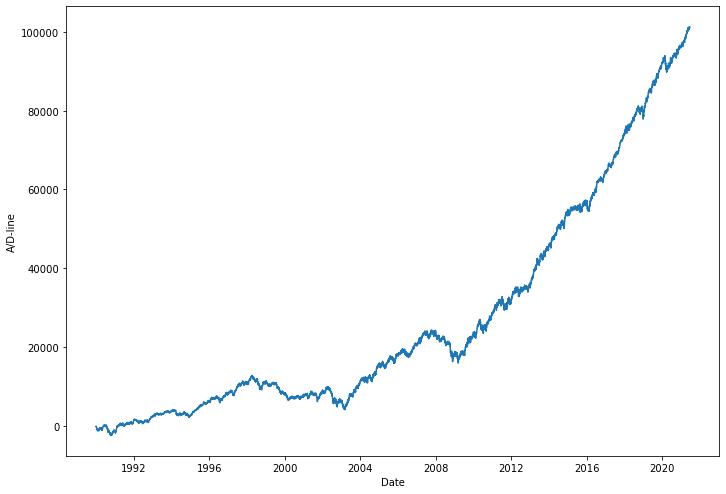

In [12]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data=ADline, ax=ax)